**IMPORTING THE TOOLS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**READING THE DATASET**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

**ELBOW METHOD TO FIND OPTIMAL K**

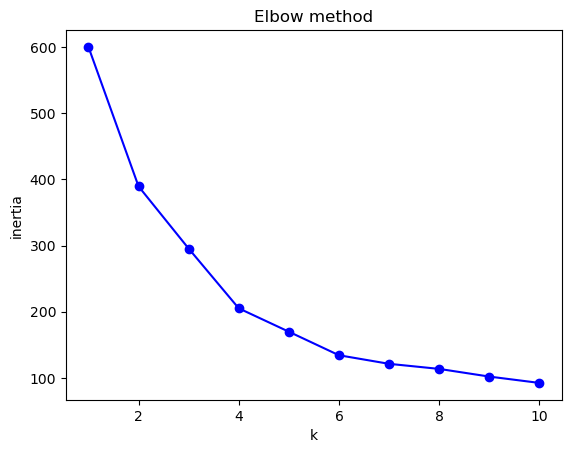

In [4]:
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow method')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

**VISUALIZING THE CLUSTERS**

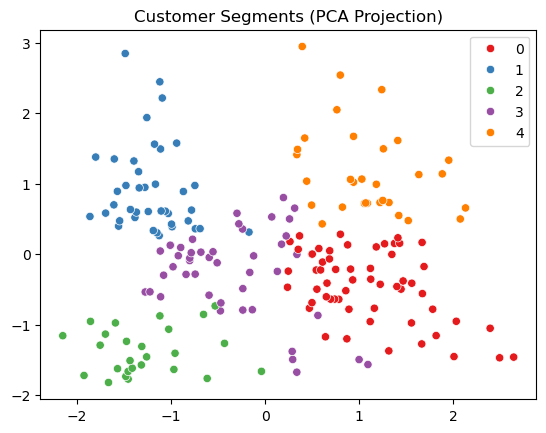

In [11]:
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='Set1')
plt.title("Customer Segments (PCA Projection)")
plt.show()

**SILHOUETTE SCORE**

In [13]:
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.40846873777345605
